# CITEC Tecnical Test

In [69]:
#Libraries
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [70]:
#Download data
# online_retail = fetch_ucirepo(id=352)
original = pd.read_csv('dataset/data.csv')

## Exploring data structure

In [71]:
#Exploring data structure
print(f'Type of online_retail: {type(online_retail)}')
print(f'Keys: {online_retail.keys()}')

NameError: name 'online_retail' is not defined

### Metadata

In [ ]:
metadata = online_retail.metadata
metadata

### Variables

In [ ]:
variables = online_retail.variables
variables

In [ ]:
variables.iloc[0]['description']

### Data

In [ ]:
#Exploring data
print(f'Type of data key: {type(online_retail.data)}')
print(f'Keys: {online_retail.data.keys()}')
data = online_retail.data

#### Ids

In [ ]:
ids = data.ids
ids

#### Features

In [ ]:
features = data.features
features

#### Target

In [ ]:
target = data.targets
target

#### Original

In [ ]:
original = data.original
original.to_csv('dataset/data.csv', index=False)
original

#### Headers

In [ ]:
headers = data.headers
headers

#### Exploring Data 

By looking at the information in the repository, it is known that there are two dataframes. The first dataframe is the original, and the second one contains only the features. However, it will be checked if the information in one matches the other, in order to work with just one, or to determine if an additional step is necessary.

In [ ]:
if original[['Description', 'Quantity','InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']].equals(features):
    print("Data is equal")
else:
    print("Data is not equal")

In the results, it can be observed that the data are identical in both dataframes. However, the original dataframe will be used to conduct the exploratory data analysis

## Exploratory Data Analysis (EDA)

The exploratory analysis begins by verifying the variables that exist and if all the data is complete

In [72]:
#Deleting spaces on str variables
original['InvoiceNo'] = original['InvoiceNo'].str.strip()
original['StockCode'] = original['StockCode'].str.strip()
original['Description'] = original['Description'].str.strip()
original['Country'] = original['Country'].str.strip()

#Create a copy of the dataframe
original_copy = original.copy()

In [73]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Let's look for duplicated data

In [74]:
duplicates = original[original.duplicated()]
duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [75]:
original.drop_duplicates(keep='first', inplace=True)

In [76]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


It can be observed that there are 1,454 records without a description. However, according to the documentation, it is known that this description refers to the product name, which is associated with a unique product code that we will use to complete the fields.

In [77]:
#Get null data associated to Description column
null_data = original[original['Description'].isnull()]
null_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [78]:
#Get the unique stock codes that exist
unique_stock_codes = original['StockCode'].nunique()
print(f"Total of different StockCodes: {unique_stock_codes}")

Total of different StockCodes: 4070


In [79]:
#Creating a dictionary with the stock codes related to the description or product name
stockcode_to_description = original.dropna(subset=['Description']).drop_duplicates('StockCode').set_index('StockCode')['Description'].to_dict()

In [80]:
print(f'Total different StockCode by description: {len(stockcode_to_description)}')

Total different StockCode by description: 3958


In [81]:
#Complete the Description data
original['Description'] = original.apply(
    lambda row: stockcode_to_description.get(row['StockCode']) if pd.isnull(row['Description']) else row['Description'],
    axis=1
)

In [82]:
row_by_index_value = original.loc[1971]
row_by_index_value

InvoiceNo                              536546
StockCode                               22145
Description    CHRISTMAS CRAFT HEART STOCKING
Quantity                                    1
InvoiceDate                   12/1/2010 14:33
UnitPrice                                 0.0
CustomerID                                NaN
Country                        United Kingdom
Name: 1971, dtype: object

In [83]:
filtered_rows = original[original['StockCode'] == '22145']
print(filtered_rows)

      InvoiceNo StockCode                     Description  Quantity  \
1971     536546     22145  CHRISTMAS CRAFT HEART STOCKING         1   
19025    537827     22145  CHRISTMAS CRAFT HEART STOCKING        30   
20392    538041     22145  CHRISTMAS CRAFT HEART STOCKING        30   

           InvoiceDate  UnitPrice  CustomerID         Country  
1971   12/1/2010 14:33        0.0         NaN  United Kingdom  
19025  12/8/2010 14:43        2.1     15332.0       Lithuania  
20392  12/9/2010 13:09        0.0         NaN  United Kingdom  


In [84]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536529 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 53.0+ MB


Some data in the 'Description' column has already been completed. Now, the missing data in the 'CustomerID' column will be addressed.
To attempt to complete the CustomerID data, the approach will be to use records with the same InvoiceNo that do have a CustomerID to fill in the missing values.

In [85]:
#Creating a dictionary with the InvoiceNo
invoice_to_customer = original.dropna(subset=['CustomerID']).drop_duplicates('InvoiceNo').set_index('InvoiceNo')['CustomerID'].to_dict()

In [86]:
#Complete the customerID based on the InvoiceNo
def fill_customer_id(row):
    if pd.isnull(row['CustomerID']):
        return invoice_to_customer.get(row['InvoiceNo'])
    else:
        return row['CustomerID']

original['CustomerID'] = original.apply(fill_customer_id, axis=1)

In [87]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536529 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 53.0+ MB


Given that there are values that could not be completed with the executed strategy, they will be removed as the intention is to perform an analysis of customer behavior over time. Since this data is missing, it will not be possible to find relationships with other records, which would only introduce a significant bias.

In [88]:
original.dropna(subset=['CustomerID'], inplace=True)

In [89]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


The analysis of the variables' behavior will be continued.

### Numerical Data

In [90]:
original.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


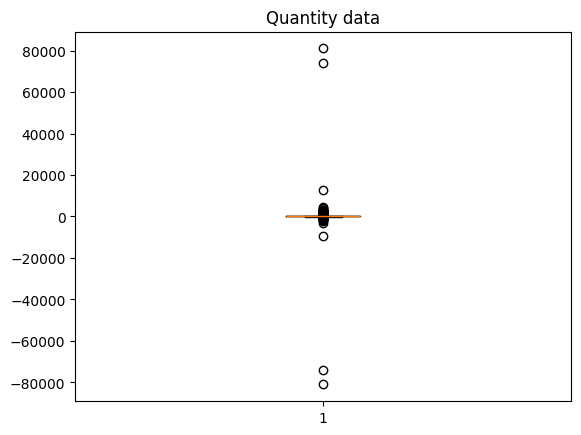

In [91]:
plt.figure()
plt.boxplot(original['Quantity'])
plt.title('Quantity data')
plt.show()

Negative data values can be observed in quantity, so we will check what it is about.

In [92]:
df_negative_quantity = original[original['Quantity'] < 0]
df_negative_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


According to the documentation, when the data in InvoiceNo starts with "C," it means that the orders are canceled. Therefore, we will verify if this applies to all records.

In [93]:
#Verifying that all data starts with "C"
starts_with_c = df_negative_quantity['InvoiceNo'].str.startswith('C')
print(f'All data starts with C: {starts_with_c.all()}')
print(f'All data starts with C: {starts_with_c.sum()}')

All data starts with C: True
All data starts with C: 8872


In [94]:
#Filtering data from original data frame which starts with "C"
starts_with_c_original = original['InvoiceNo'].str.startswith('C')
filtered = original[starts_with_c_original]
print(f'All data starts with C: {starts_with_c_original.all()}')
print(f'All data starts with C: {starts_with_c_original.sum()}')

All data starts with C: False
All data starts with C: 8872


In [95]:
# Verifying if that data is the same
if filtered.equals(df_negative_quantity):
    print("The same data")

The same data



This information will be retained because it can provide insights into customer behavior regarding cancellations, which influences the likelihood of them placing an order in the next 30 days.


The review of outlier values will continue.

In [96]:
original['Z_Score_Quantity'] = stats.zscore(original['Quantity'])
threshold = 20
outliers = original[(original['Z_Score_Quantity'] > threshold) | (original['Z_Score_Quantity'] < -threshold)]

outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Z_Score_Quantity
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,-37.446385
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,296.475982
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,-296.573338
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,United Kingdom,50.054660
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,323.565346
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,-323.662702


Upon reviewing the data, a threshold of 20 was used because it captures the data points that deviate the most from typical values.

In [97]:
filtered_df = original[original['CustomerID'] == 15838.0]
filtered_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Z_Score_Quantity
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,-37.446385
14269,537476,22379,RECYCLING BAG RETROSPOT,150,12/7/2010 11:26,1.85,15838.0,United Kingdom,0.550644
14270,537476,22381,TOY TIDY PINK POLKADOT,100,12/7/2010 11:26,1.85,15838.0,United Kingdom,0.350870
14271,537476,85099B,JUMBO BAG RED RETROSPOT,300,12/7/2010 11:26,1.65,15838.0,United Kingdom,1.149966
79207,542921,22379,RECYCLING BAG RETROSPOT,100,2/2/2011 7:58,1.85,15838.0,United Kingdom,0.350870
...,...,...,...,...,...,...,...,...,...
506975,579163,22865,HAND WARMER OWL DESIGN,96,11/28/2011 13:59,1.79,15838.0,United Kingdom,0.334888
506976,579163,22633,HAND WARMER UNION JACK,96,11/28/2011 13:59,1.79,15838.0,United Kingdom,0.334888
506977,579163,22759,SET OF 3 NOTEBOOKS IN PARCEL,144,11/28/2011 13:59,1.45,15838.0,United Kingdom,0.526671
506978,579164,22866,HAND WARMER SCOTTY DOG DESIGN,96,11/28/2011 14:00,1.85,15838.0,United Kingdom,0.334888


In [98]:
filtered_df = original[original['CustomerID'] == 13256.0]
filtered_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Z_Score_Quantity
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.0,13256.0,United Kingdom,50.05466



> We see two data points that are far from normal, where an order was placed and then canceled within minutes. This would indicate an error or confusion with the order. Therefore, these data points will be removed as they do not reflect typical customer behavior. 

> The order with InvoiceNo equal to C536757 is deleted since it is a cancellation order, which may indicate an error at the time of placing the order, as there is no initial order.

> The order with InvoiceNo 578841 will be retained since there is no cancellation order, and upon reviewing the product, it appears to be a quantity that could be expected.

In [99]:
invoice_list = ['C536757','541431','C541433','581483','C581484']
original = original[~original['InvoiceNo'].isin(invoice_list) ]
original = original.drop('Z_Score_Quantity', axis=1)
original.describe()

,Quantity,UnitPrice,CustomerID
count,401599.000000,401599.000000,401599.000000
mean,12.206731,3.474091,15281.168247
std,48.202435,69.764469,1714.002046
min,-3114.000000,0.000000,12347.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16786.000000
max,12540.000000,38970.000000,18287.000000



Now we will verify the data associated with the price.

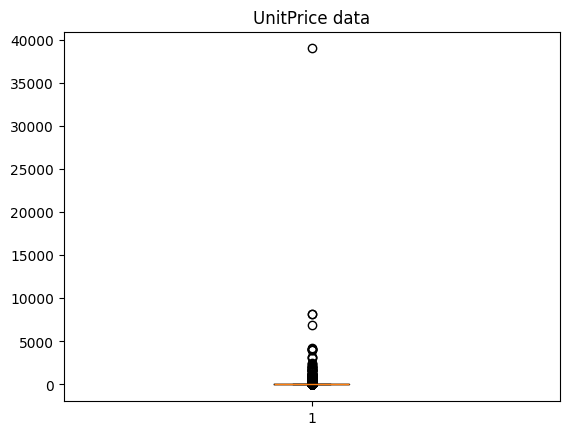

In [100]:
plt.figure()
plt.boxplot(original['UnitPrice'])
plt.title('UnitPrice data')
plt.show()

We can see that there are outlier values

In [101]:
original['Z_Score_UnitPrice'] = stats.zscore(original['UnitPrice'])
threshold = 30
outliers = original[(original['Z_Score_UnitPrice'] > threshold) | (original['Z_Score_UnitPrice'] < -threshold)]

outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Z_Score_UnitPrice
144826,548813,M,Manual,1,4/4/2011 13:03,2382.92,12744.0,Singapore,34.106887
144831,C548830,M,Manual,-1,4/4/2011 13:08,2382.92,12744.0,Singapore,34.106887
173277,C551685,POST,POSTAGE,-1,5/3/2011 12:51,8142.75,16029.0,United Kingdom,116.668072
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029.0,United Kingdom,116.668072
173391,C551699,M,Manual,-1,5/3/2011 14:12,6930.00,16029.0,United Kingdom,99.284559
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.00,15098.0,United Kingdom,558.544701
268027,C560372,M,Manual,-1,7/18/2011 12:26,4287.63,17448.0,United Kingdom,61.408928
271151,C560647,M,Manual,-1,7/20/2011 11:31,3060.60,18102.0,United Kingdom,43.820727
293842,C562647,M,Manual,-1,8/8/2011 12:56,3155.95,15502.0,United Kingdom,45.187470
297438,562946,M,Manual,1,8/11/2011 9:38,2500.00,15581.0,United Kingdom,35.785107


A threshold of 30 was used to check for the most extreme values. However, this indicates that these transactions were done manually and not associated with a specific product. For this reason, these transactions will not be altered.

In [102]:
original = original.drop('Z_Score_UnitPrice', axis=1)
original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401599 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401599 non-null  object 
 1   StockCode    401599 non-null  object 
 2   Description  401599 non-null  object 
 3   Quantity     401599 non-null  int64  
 4   InvoiceDate  401599 non-null  object 
 5   UnitPrice    401599 non-null  float64
 6   CustomerID   401599 non-null  float64
 7   Country      401599 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


Now, let's look for data with Positive quantity for cancelled orders 

In [103]:
filtered_df_positive_cancelled = original[(original['InvoiceNo'].str.startswith('C')) & (original['Quantity'] > 0)]
filtered_df_positive_cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Now, let's look for data with Negative quantity for Not orders 

In [104]:
filtered_df_negative_not_cancelled = original[~original['InvoiceNo'].str.startswith('C') & (original['Quantity'] < 0)]
filtered_df_negative_not_cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


No data was found where canceled orders have positive quantity values or non-canceled orders have negative quantity values.

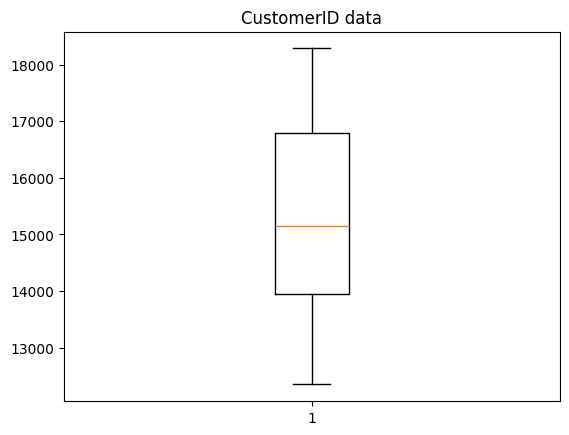

In [105]:
plt.figure()
plt.boxplot(original['CustomerID'])
plt.title('CustomerID data')
plt.show()

The customer ID information is within a normal range, so it can be seen that there are no outliers.

### Categorical Data

In [106]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401599 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401599 non-null  object 
 1   StockCode    401599 non-null  object 
 2   Description  401599 non-null  object 
 3   Quantity     401599 non-null  int64  
 4   InvoiceDate  401599 non-null  object 
 5   UnitPrice    401599 non-null  float64
 6   CustomerID   401599 non-null  float64
 7   Country      401599 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In theory, we should have the same number of categories in StockCode as in Description, since both refer to the product itself

In [107]:
original['StockCode'].value_counts()

StockCode
85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
90214U       1
90162A       1
90214T       1
90214Z       1
90214O       1
Name: count, Length: 3683, dtype: int64

In [108]:
original['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2058
REGENCY CAKESTAND 3 TIER               1894
JUMBO BAG RED RETROSPOT                1659
PARTY BUNTING                          1409
ASSORTED COLOUR BIRD ORNAMENT          1405
                                       ... 
BLUE/GREEN SHELL NECKLACE W PENDANT       1
LETTER "W" BLING KEY RING                 1
LETTER "Z" BLING KEY RING                 1
WHITE STONE/CRYSTAL EARRINGS              1
UNION JACK HOT WATER BOTTLE               1
Name: count, Length: 3884, dtype: int64

In [109]:
duplicated_stockcodes = original.groupby('StockCode').filter(lambda x: x['Description'].nunique() > 1)

# Mostrar el resultado
duplicated_stockcodes

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
47,536372,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 9:01,1.85,17850.0,United Kingdom
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:02,2.55,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541884,581585,84946,ANTIQUE SILVER T-LIGHT GLASS,12,12/9/2011 12:31,1.25,15804.0,United Kingdom
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,12/9/2011 12:31,0.95,15804.0,United Kingdom
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France


In [110]:
print("StockCodes con descripciones diferentes:")
print(duplicated_stockcodes['StockCode'].unique())

StockCodes con descripciones diferentes:
['85123A' '71053' '22632' '82486' '84997B' '84997C' '20725' '21175'
 '22778' '22466' '22963' '22197' '22502' '21232' '22804' '22837' '22383'
 '20914' '22813' '22812' '22785' '22972' '21811' '84906' '21243' '22179'
 '85184C' '22952' '22595' '84997D' '22776' '22584' '82600' '21928' '22597'
 '22953' '22847' '21818' '22965' '84997A' '71477' '22135' '22602' '22777'
 '22896' '22285' '22849' '22986' '84946' '21899' '85185B' '22985' '21507'
 '71459' '85144' '17107D' '22246' '21112' '47310M' '22939' '22129' '21109'
 '22199' '22134' '22949' '79030D' '79030G' '79051A' '84247E' '82001S'
 '22932' '22937' '84828' '44235' '22416' '84228' '81950V' '90014B' '20622'
 '35817P' '22407' '90014A' '22286' '16156L' '22268' '23231' '22287'
 '23232' '22999' '23194' '23126' '23127' '23128' '90014C' '23254' '23256'
 '23205' '23065' '23057' '23066' '23068' '23075' '23061' '23056' '23071'
 '23148' '23145' '23253' '23131' '23283' '23041' '23130' '23299' '23298'
 '23043' '2304

In [111]:
stockcode_a_data = original[original['StockCode'] == '23203']
stockcode_a_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
179069,552261,23203,JUMBO BAG DOILEY PATTERNS,10,5/8/2011 11:34,2.08,16807.0,United Kingdom
179259,552268,23203,JUMBO BAG DOILEY PATTERNS,20,5/8/2011 11:49,2.08,14709.0,United Kingdom
179301,552269,23203,JUMBO BAG DOILEY PATTERNS,1,5/8/2011 11:52,2.08,16121.0,United Kingdom
179322,552269,23203,JUMBO BAG DOILEY PATTERNS,2,5/8/2011 11:52,2.08,16121.0,United Kingdom
179397,552274,23203,JUMBO BAG DOILEY PATTERNS,10,5/8/2011 12:30,2.08,16523.0,United Kingdom
...,...,...,...,...,...,...,...,...
534745,581167,23203,JUMBO BAG VINTAGE DOILY,10,12/7/2011 14:52,2.08,13534.0,United Kingdom
535253,581193,23203,JUMBO BAG VINTAGE DOILY,1,12/7/2011 17:05,2.08,17097.0,Spain
538184,581401,23203,JUMBO BAG VINTAGE DOILY,10,12/8/2011 13:43,2.08,17644.0,United Kingdom
538254,581403,23203,JUMBO BAG VINTAGE DOILY,10,12/8/2011 13:46,2.08,13510.0,United Kingdom


In [112]:
stockcode_a_data = original[original['Description'] == 'JUMBO BAG DOILEY PATTERNS']
stockcode_a_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
179069,552261,23203,JUMBO BAG DOILEY PATTERNS,10,5/8/2011 11:34,2.08,16807.0,United Kingdom
179259,552268,23203,JUMBO BAG DOILEY PATTERNS,20,5/8/2011 11:49,2.08,14709.0,United Kingdom
179301,552269,23203,JUMBO BAG DOILEY PATTERNS,1,5/8/2011 11:52,2.08,16121.0,United Kingdom
179322,552269,23203,JUMBO BAG DOILEY PATTERNS,2,5/8/2011 11:52,2.08,16121.0,United Kingdom
179397,552274,23203,JUMBO BAG DOILEY PATTERNS,10,5/8/2011 12:30,2.08,16523.0,United Kingdom
...,...,...,...,...,...,...,...,...
336312,566317,23203,JUMBO BAG DOILEY PATTERNS,10,9/12/2011 10:19,2.08,13375.0,United Kingdom
349346,567504,23203,JUMBO BAG DOILEY PATTERNS,10,9/20/2011 14:33,2.08,13356.0,United Kingdom
373458,569331,23203,JUMBO BAG DOILEY PATTERNS,10,10/3/2011 13:39,2.08,16875.0,United Kingdom
381081,569846,23203,JUMBO BAG DOILEY PATTERNS,10,10/6/2011 13:42,2.08,13422.0,United Kingdom


In [113]:
stockcode_a_data = original[original['Description'] == 'JUMBO BAG VINTAGE DOILY']
stockcode_a_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
292655,562558,23203,JUMBO BAG VINTAGE DOILY,3,8/5/2011 16:43,2.08,13451.0,United Kingdom
292680,562560,23203,JUMBO BAG VINTAGE DOILY,3,8/5/2011 17:12,2.08,14156.0,EIRE
292837,562562,23203,JUMBO BAG VINTAGE DOILY,30,8/5/2011 17:43,2.08,16271.0,United Kingdom
292929,562569,23203,JUMBO BAG VINTAGE DOILY,3,8/7/2011 12:05,2.08,17323.0,United Kingdom
293192,562587,23203,JUMBO BAG VINTAGE DOILY,10,8/7/2011 14:34,2.08,15640.0,United Kingdom
...,...,...,...,...,...,...,...,...
534745,581167,23203,JUMBO BAG VINTAGE DOILY,10,12/7/2011 14:52,2.08,13534.0,United Kingdom
535253,581193,23203,JUMBO BAG VINTAGE DOILY,1,12/7/2011 17:05,2.08,17097.0,Spain
538184,581401,23203,JUMBO BAG VINTAGE DOILY,10,12/8/2011 13:43,2.08,17644.0,United Kingdom
538254,581403,23203,JUMBO BAG VINTAGE DOILY,10,12/8/2011 13:46,2.08,13510.0,United Kingdom


As observed in the examples, the products are given different names, but they refer to the same item. On the other hand, the StockCode refers to a product and cannot be changed. For this reason, we will keep this data and delete Description data.

In [116]:
original = original.drop('Description', axis=1)
original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401599 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401599 non-null  object 
 1   StockCode    401599 non-null  object 
 2   Quantity     401599 non-null  int64  
 3   InvoiceDate  401599 non-null  object 
 4   UnitPrice    401599 non-null  float64
 5   CustomerID   401599 non-null  float64
 6   Country      401599 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.5+ MB


In [131]:
StockCode_freq = original['StockCode'].value_counts()
StockCode_freq_one = StockCode_freq[StockCode_freq == 1]
StockCode_freq_one

StockCode
90176B    1
47016     1
90181A    1
90199B    1
90069     1
         ..
90214U    1
90162A    1
90214T    1
90214Z    1
90214O    1
Name: count, Length: 161, dtype: int64

It is necessary to convert to datatime information the data. Just to be sure that data has the correct format

In [121]:
original['InvoiceDate'] = pd.to_datetime(original['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [125]:
max_date = original['InvoiceDate'].max()
min_date = original['InvoiceDate'].min()

print(f'Max Date: {max_date}')
print(f'Min Date: {min_date}')

Max Date: 2011-12-09 12:50:00
Min Date: 2010-12-01 08:26:00


In [122]:
original.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


As can be seen, the date data makes sense according to the description present in the repository. On the other hand, the InvoiceNo data are numbers associated with the invoice as an identifier, so it does not provide much useful information for a model like the one we want to build.

In [126]:
original = original.drop('InvoiceNo', axis=1)

In [127]:
original.head()

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [128]:
original.to_csv('dataset/data_processed.csv', index=False)

## Cohort analysis

In [132]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401599 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    401599 non-null  object        
 1   Quantity     401599 non-null  int64         
 2   InvoiceDate  401599 non-null  datetime64[ns]
 3   UnitPrice    401599 non-null  float64       
 4   CustomerID   401599 non-null  float64       
 5   Country      401599 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 21.4+ MB


In [133]:
#Creates a column called CohortMonth
original['CohortMonth'] = original.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')